In [1]:
%load_ext autoreload
%autoreload 2
import hippo
import mrich
from rich import print
import molparse as mp
import plotly.express as px
import pandas as pd
from pathlib import Path
import json

In [2]:
animal = hippo.HIPPO("RdRp_FFF", "../../BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp.sqlite")

 Creating HIPPO animal

name = RdRp_FFF

db_path = ../../BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp.sqlite

DEBUG: hippo.Database.__init__()

DEBUG: Database.path = ../../BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp.sqlite

DEBUG: hippo.Database.connect()

DEBUG: sqlite3.version='2.6.0'

 Success  Database connected @ ../../BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp.sqlite!

 Success  Initialised animal HIPPO("RdRp_FFF")!

In [3]:
animal.db.backup()

 DISK  Writing /opt/xchem-fragalysis-2/maxwin/BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp_0L1DXM2.sqlite...

Output()

DEBUG: Copied 10000 of 519130 pages...

DEBUG: Copied 20000 of 519130 pages...

DEBUG: Copied 30000 of 519130 pages...

DEBUG: Copied 40000 of 519130 pages...

DEBUG: Copied 50000 of 519130 pages...

DEBUG: Copied 60000 of 519130 pages...

DEBUG: Copied 70000 of 519130 pages...

DEBUG: Copied 80000 of 519130 pages...

DEBUG: Copied 90000 of 519130 pages...

DEBUG: Copied 100000 of 519130 pages...

DEBUG: Copied 110000 of 519130 pages...

DEBUG: Copied 120000 of 519130 pages...

DEBUG: Copied 130000 of 519130 pages...

DEBUG: Copied 140000 of 519130 pages...

DEBUG: Copied 150000 of 519130 pages...

DEBUG: Copied 160000 of 519130 pages...

DEBUG: Copied 170000 of 519130 pages...

DEBUG: Copied 180000 of 519130 pages...

DEBUG: Copied 190000 of 519130 pages...

DEBUG: Copied 200000 of 519130 pages...

DEBUG: Copied 210000 of 519130 pages...

DEBUG: Copied 220000 of 519130 pages...

DEBUG: Copied 230000 of 519130 pages...

DEBUG: Copied 240000 of 519130 pages...

DEBUG: Copied 250000 of 519130 pages...

DEBUG: Copied 260000 of 519130 pages...

DEBUG: Copied 270000 of 519130 pages...

DEBUG: Copied 280000 of 519130 pages...

DEBUG: Copied 290000 of 519130 pages...

DEBUG: Copied 300000 of 519130 pages...

DEBUG: Copied 310000 of 519130 pages...

DEBUG: Copied 320000 of 519130 pages...

DEBUG: Copied 330000 of 519130 pages...

DEBUG: Copied 340000 of 519130 pages...

DEBUG: Copied 350000 of 519130 pages...

DEBUG: Copied 360000 of 519130 pages...

DEBUG: Copied 370000 of 519130 pages...

DEBUG: Copied 380000 of 519130 pages...

DEBUG: Copied 390000 of 519130 pages...

DEBUG: Copied 400000 of 519130 pages...

DEBUG: Copied 410000 of 519130 pages...

DEBUG: Copied 420000 of 519130 pages...

DEBUG: Copied 430000 of 519130 pages...

DEBUG: Copied 440000 of 519130 pages...

DEBUG: Copied 450000 of 519130 pages...

DEBUG: Copied 460000 of 519130 pages...

DEBUG: Copied 470000 of 519130 pages...

DEBUG: Copied 480000 of 519130 pages...

DEBUG: Copied 490000 of 519130 pages...

DEBUG: Copied 500000 of 519130 pages...

DEBUG: Copied 510000 of 519130 pages...

DEBUG: Copied 519130 of 519130 pages...

In [6]:
scaffold = animal.compounds["ASAP-0037733"]

In [12]:
scaffold_reaction = animal.reactions[429]

In [19]:
scaffold_reactants = scaffold_reaction.reactants
scaffold_reactants_ids = set(scaffold_reactants.ids)

In [18]:
elabs = scaffold.elabs

In [28]:
reaction_map = animal.db.get_reaction_map_from_products(elabs.ids)
reaction_map = { k[1]:list(v.values())[0] for k,v in reaction_map.items() }

In [29]:
reaction_map

{77413: {70030, 77227},
 77414: {70030, 77228},
 77415: {70030, 77229},
 77416: {70030, 77230},
 77417: {70030, 77231},
 77418: {70030, 77232},
 77419: {70030, 77233},
 77420: {70030, 77234},
 77421: {70030, 77235},
 77422: {70030, 77236},
 77423: {70030, 77237},
 77424: {70030, 77238},
 77425: {70030, 77239},
 77426: {70030, 77240},
 77427: {70030, 77241},
 77428: {70030, 77242},
 77429: {70030, 77243},
 77430: {70030, 77244},
 77431: {70030, 77245},
 77432: {69755, 77326},
 77433: {69755, 77327},
 77434: {69755, 77328},
 77435: {69755, 77329},
 77436: {69755, 77330},
 77437: {69755, 77331},
 77438: {69755, 77332},
 77439: {69755, 77333},
 77440: {69755, 77334},
 77441: {70030, 77246},
 77442: {70030, 77247},
 77443: {70030, 77248},
 77444: {70030, 77249},
 77445: {70030, 77250},
 77446: {77240, 77333},
 77447: {70030, 77251},
 77448: {70030, 77252},
 77449: {70030, 77253},
 77450: {70030, 77254},
 77451: {70030, 77255},
 77452: {77227, 77333},
 77453: {77227, 77331},
 77454: {77240, 

In [33]:
picks = set()

for elab_id in mrich.track(elabs.ids):

    # r = elab.reactions[0]

    reactants = reaction_map[elab_id]

    n_shared = len(reactants.intersection(scaffold_reactants_ids))

    match n_shared:
        case 0:
            # print(elab, r, "NO")
            continue
        case 1:
            # print(elab, r, "YES")
            picks.add(elab_id)
        case 2:
            # print(elab, r, "SCAFFOLD")
            continue

picks = animal.compounds[picks]

Output()

/opt/xchem-fragalysis-2/maxwin/conda/lib/python3.12/site-packages/rdkit/Chem/Draw/IPythonConsole.py:344: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



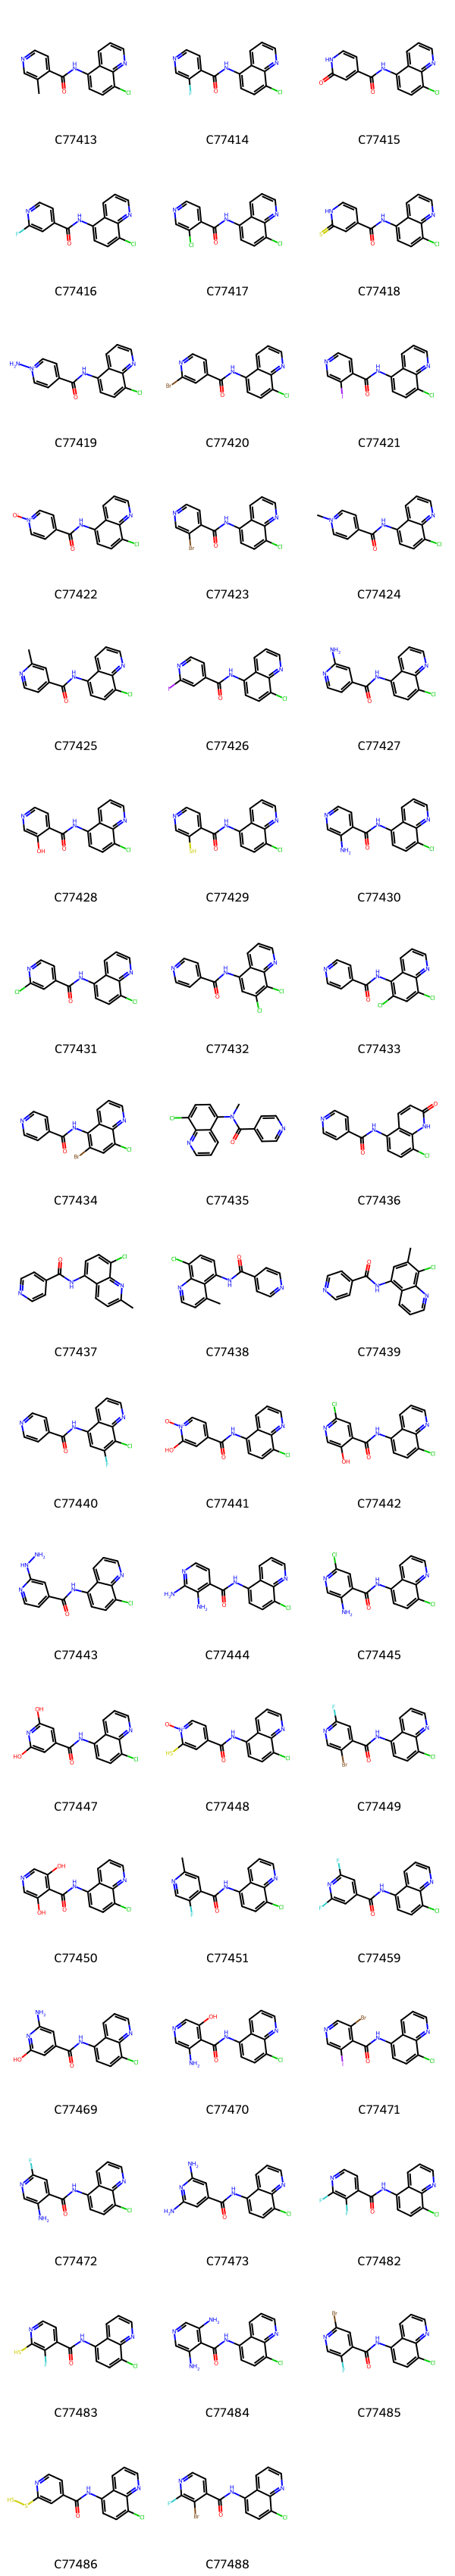

In [35]:
picks.draw()

In [36]:
recipes = hippo.Recipe.from_compounds(picks, quoted_only=False, pick_first=False, pick_cheapest=False)

#compounds = 186

Output()

 Success  Found solution for compound=C77413!

 Success  Found solution for compound=C77414!

 Success  Found solution for compound=C77415!

 Success  Found solution for compound=C77416!

 Success  Found solution for compound=C77417!

 Success  Found solution for compound=C77418!

 Success  Found solution for compound=C77419!

 Success  Found solution for compound=C77420!

 Success  Found solution for compound=C77421!

 Success  Found solution for compound=C77422!

 Success  Found solution for compound=C77423!

 Success  Found solution for compound=C77424!

 Success  Found solution for compound=C77425!

 Success  Found solution for compound=C77426!

 Success  Found solution for compound=C77427!

 Success  Found solution for compound=C77428!

 Success  Found solution for compound=C77429!

 Success  Found solution for compound=C77430!

 Success  Found solution for compound=C77431!

 Success  Found solution for compound=C77432!

 Success  Found solution for compound=C77433!

 Success  Found solution for compound=C77434!

 Success  Found solution for compound=C77435!

 Success  Found solution for compound=C77436!

 Success  Found solution for compound=C77437!

 Success  Found solution for compound=C77438!

 Success  Found solution for compound=C77439!

 Success  Found solution for compound=C77440!

 Success  Found solution for compound=C77441!

 Success  Found solution for compound=C77442!

 Success  Found solution for compound=C77443!

 Success  Found solution for compound=C77444!

 Success  Found solution for compound=C77445!

 Success  Found solution for compound=C77447!

 Success  Found solution for compound=C77448!

 Success  Found solution for compound=C77449!

 Success  Found solution for compound=C77450!

 Success  Found solution for compound=C77451!

 Success  Found solution for compound=C77459!

 Success  Found solution for compound=C77469!

 Success  Found solution for compound=C77470!

 Success  Found solution for compound=C77471!

 Success  Found solution for compound=C77472!

 Success  Found solution for compound=C77473!

 Success  Found solution for compound=C77482!

 Success  Found solution for compound=C77483!

 Success  Found solution for compound=C77484!

 Success  Found solution for compound=C77485!

 Success  Found solution for compound=C77486!

 Success  Found solution for compound=C77488!

 Success  Found solution for compound=C77489!

 Success  Found solution for compound=C77490!

 Success  Found solution for compound=C77494!

 Success  Found solution for compound=C77501!

 Success  Found solution for compound=C77502!

 Success  Found solution for compound=C77503!

 Success  Found solution for compound=C77504!

 Success  Found solution for compound=C77514!

 Success  Found solution for compound=C77515!

 Success  Found solution for compound=C77516!

 Success  Found solution for compound=C77517!

 Success  Found solution for compound=C77518!

 Success  Found solution for compound=C77519!

 Success  Found solution for compound=C77529!

 Success  Found solution for compound=C77530!

 Success  Found solution for compound=C77531!

 Success  Found solution for compound=C77532!

 Success  Found solution for compound=C77533!

 Success  Found solution for compound=C77563!

 Success  Found solution for compound=C77591!

 Success  Found solution for compound=C77592!

 Success  Found solution for compound=C77593!

 Success  Found solution for compound=C77602!

 Success  Found solution for compound=C77604!

 Success  Found solution for compound=C77605!

 Success  Found solution for compound=C77606!

 Success  Found solution for compound=C77614!

 Success  Found solution for compound=C77615!

 Success  Found solution for compound=C77616!

 Success  Found solution for compound=C77617!

 Success  Found solution for compound=C77618!

 Success  Found solution for compound=C77619!

 Success  Found solution for compound=C77620!

 Success  Found solution for compound=C77621!

 Success  Found solution for compound=C77632!

 Success  Found solution for compound=C77633!

 Success  Found solution for compound=C77634!

 Success  Found solution for compound=C77635!

 Success  Found solution for compound=C77644!

 Success  Found solution for compound=C77645!

 Success  Found solution for compound=C77647!

 Success  Found solution for compound=C77653!

 Success  Found solution for compound=C77654!

 Success  Found solution for compound=C77666!

 Success  Found solution for compound=C77667!

 Success  Found solution for compound=C77668!

 Success  Found solution for compound=C77669!

 Success  Found solution for compound=C77680!

 Success  Found solution for compound=C77681!

 Success  Found solution for compound=C77682!

 Success  Found solution for compound=C77684!

 Success  Found solution for compound=C77686!

 Success  Found solution for compound=C77687!

 Success  Found solution for compound=C77688!

 Success  Found solution for compound=C77689!

 Success  Found solution for compound=C77690!

 Success  Found solution for compound=C77691!

 Success  Found solution for compound=C77692!

 Success  Found solution for compound=C77693!

 Success  Found solution for compound=C77694!

 Success  Found solution for compound=C77695!

 Success  Found solution for compound=C77696!

 Success  Found solution for compound=C77697!

 Success  Found solution for compound=C77698!

 Success  Found solution for compound=C77699!

 Success  Found solution for compound=C77700!

 Success  Found solution for compound=C77701!

 Success  Found solution for compound=C78594!

 Success  Found solution for compound=C78595!

 Success  Found solution for compound=C78596!

 Success  Found solution for compound=C78597!

 Success  Found solution for compound=C78598!

 Success  Found solution for compound=C78599!

 Success  Found solution for compound=C78600!

 Success  Found solution for compound=C78601!

 Success  Found solution for compound=C78602!

 Success  Found solution for compound=C78603!

 Success  Found solution for compound=C79528!

 Success  Found solution for compound=C79529!

 Success  Found solution for compound=C79532!

 Success  Found solution for compound=C79541!

 Success  Found solution for compound=C79542!

 Success  Found solution for compound=C79556!

 Success  Found solution for compound=C79557!

 Success  Found solution for compound=C79558!

 Success  Found solution for compound=C79560!

 Success  Found solution for compound=C79580!

 Success  Found solution for compound=C79581!

 Success  Found solution for compound=C79582!

 Success  Found solution for compound=C79583!

 Success  Found solution for compound=C79584!

 Success  Found solution for compound=C79586!

 Success  Found solution for compound=C79587!

 Success  Found solution for compound=C79588!

 Success  Found solution for compound=C79589!

 Success  Found solution for compound=C79590!

 Success  Found solution for compound=C79591!

 Success  Found solution for compound=C79592!

 Success  Found solution for compound=C79593!

 Success  Found solution for compound=C79811!

 Success  Found solution for compound=C79826!

 Success  Found solution for compound=C79827!

 Success  Found solution for compound=C79828!

 Success  Found solution for compound=C79829!

 Success  Found solution for compound=C79830!

 Success  Found solution for compound=C79831!

 Success  Found solution for compound=C79832!

 Success  Found solution for compound=C79833!

 Success  Found solution for compound=C79834!

 Success  Found solution for compound=C79835!

 Success  Found solution for compound=C79836!

 Success  Found solution for compound=C79837!

 Success  Found solution for compound=C79839!

 Success  Found solution for compound=C79926!

 Success  Found solution for compound=C79927!

 Success  Found solution for compound=C79928!

 Success  Found solution for compound=C79929!

 Success  Found solution for compound=C79942!

 Success  Found solution for compound=C79946!

 Success  Found solution for compound=C79947!

 Success  Found solution for compound=C79949!

 Success  Found solution for compound=C79950!

 Success  Found solution for compound=C79951!

 Success  Found solution for compound=C79952!

 Success  Found solution for compound=C79953!

 Success  Found solution for compound=C79954!

 Success  Found solution for compound=C79955!

 Success  Found solution for compound=C79956!

 Success  Found solution for compound=C79957!

 Success  Found solution for compound=C79958!

 Success  Found solution for compound=C79959!

 Success  Found solution for compound=C79960!

 Success  Found solution for compound=C79961!

 Success  Found solution for compound=C79962!

 Success  Found solution for compound=C79963!

Solving recipe combinations...

Output()

In [41]:
recipe = recipes[0]
recipe

Recipe({Ingredient × 188} --> {Ingredient × 186} via {R × 186})

In [39]:
recipe.write_json("RdRp_t3c_i2a_C29639.json")

 Warning  NULL Quote: 1.00mg of C77233!

 Warning  NULL Quote: 1.00mg of C77238!

 Warning  NULL Quote: 1.00mg of C77240!

 Warning  NULL Quote: 1.00mg of C77326!

 Warning  NULL Quote: 1.00mg of C77327!

 Warning  NULL Quote: 1.00mg of C77330!

 Warning  NULL Quote: 1.00mg of C77331!

 Warning  NULL Quote: 1.00mg of C77333!

 Warning  NULL Quote: 1.00mg of C77334!

 Warning  NULL Quote: 1.00mg of C77246!

 Warning  NULL Quote: 1.00mg of C77248!

 Warning  NULL Quote: 1.00mg of C77252!

 Warning  NULL Quote: 1.00mg of C77253!

 Warning  NULL Quote: 1.00mg of C77254!

 Warning  NULL Quote: 1.00mg of C77255!

 Warning  NULL Quote: 1.00mg of C77257!

 Warning  NULL Quote: 1.00mg of C77258!

 Warning  NULL Quote: 1.00mg of C77259!

 Warning  NULL Quote: 1.00mg of C77263!

 Warning  NULL Quote: 1.00mg of C77264!

 Warning  NULL Quote: 1.00mg of C77266!

 Warning  NULL Quote: 1.00mg of C77267!

 Warning  NULL Quote: 1.00mg of C77271!

 Warning  NULL Quote: 1.00mg of C77274!

 Warning  NULL Quote: 1.00mg of C77276!

 Warning  NULL Quote: 1.00mg of C77279!

 Warning  NULL Quote: 1.00mg of C77281!

 Warning  NULL Quote: 1.00mg of C77282!

 Warning  NULL Quote: 1.00mg of C77283!

 Warning  NULL Quote: 1.00mg of C77284!

 Warning  NULL Quote: 1.00mg of C77286!

 Warning  NULL Quote: 1.00mg of C77287!

 Warning  NULL Quote: 1.00mg of C77288!

 Warning  NULL Quote: 1.00mg of C77290!

 Warning  NULL Quote: 1.00mg of C77291!

 Warning  NULL Quote: 1.00mg of C77292!

 Warning  NULL Quote: 1.00mg of C77293!

 Warning  NULL Quote: 1.00mg of C77298!

 Warning  NULL Quote: 1.00mg of C77300!

 Warning  NULL Quote: 1.00mg of C77301!

 Warning  NULL Quote: 1.00mg of C77305!

 Warning  NULL Quote: 1.00mg of C77306!

 Warning  NULL Quote: 1.00mg of C77313!

 Warning  NULL Quote: 1.00mg of C77314!

 Warning  NULL Quote: 1.00mg of C77335!

 Warning  NULL Quote: 1.00mg of C77320!

 Warning  NULL Quote: 1.00mg of C77336!

 Warning  NULL Quote: 1.00mg of C77337!

 Warning  NULL Quote: 1.00mg of C77338!

 Warning  NULL Quote: 1.00mg of C77339!

 Warning  NULL Quote: 1.00mg of C77340!

 Warning  NULL Quote: 1.00mg of C77341!

 Warning  NULL Quote: 1.00mg of C77342!

 Warning  NULL Quote: 1.00mg of C77343!

 Warning  NULL Quote: 1.00mg of C77344!

 Warning  NULL Quote: 1.00mg of C77345!

 Warning  NULL Quote: 1.00mg of C77346!

 Warning  NULL Quote: 1.00mg of C77347!

 Warning  NULL Quote: 1.00mg of C77348!

 Warning  NULL Quote: 1.00mg of C77349!

 Warning  NULL Quote: 1.00mg of C77350!

 Warning  NULL Quote: 1.00mg of C77351!

 Warning  NULL Quote: 1.00mg of C77352!

 Warning  NULL Quote: 1.00mg of C77353!

 Warning  NULL Quote: 1.00mg of C77354!

 Warning  NULL Quote: 1.00mg of C77355!

 Warning  NULL Quote: 1.00mg of C77356!

 Warning  NULL Quote: 1.00mg of C77357!

 Warning  NULL Quote: 1.00mg of C77358!

 Warning  NULL Quote: 1.00mg of C77359!

 Warning  NULL Quote: 1.00mg of C77360!

 Warning  NULL Quote: 1.00mg of C77361!

 Warning  NULL Quote: 1.00mg of C77362!

 Warning  NULL Quote: 1.00mg of C77363!

 Warning  NULL Quote: 1.00mg of C77364!

 Warning  NULL Quote: 1.00mg of C77365!

 Warning  NULL Quote: 1.00mg of C77366!

 Warning  NULL Quote: 1.00mg of C77367!

 Warning  NULL Quote: 1.00mg of C77368!

 Warning  NULL Quote: 1.00mg of C77369!

 Warning  NULL Quote: 1.00mg of C77370!

 Warning  NULL Quote: 1.00mg of C77371!

 Warning  NULL Quote: 1.00mg of C77372!

 Warning  NULL Quote: 1.00mg of C77373!

 Warning  NULL Quote: 1.00mg of C77374!

 Warning  NULL Quote: 1.00mg of C77375!

 Warning  NULL Quote: 1.00mg of C77376!

 Warning  NULL Quote: 1.00mg of C77377!

 Warning  NULL Quote: 1.00mg of C77378!

 Warning  NULL Quote: 1.00mg of C77379!

 Warning  NULL Quote: 1.00mg of C77380!

 Warning  NULL Quote: 1.00mg of C77381!

 Warning  NULL Quote: 1.00mg of C77382!

 Warning  NULL Quote: 1.00mg of C77383!

 Warning  NULL Quote: 1.00mg of C77384!

 Warning  NULL Quote: 1.00mg of C77385!

 Warning  NULL Quote: 1.00mg of C77386!

 Warning  NULL Quote: 1.00mg of C77387!

 Warning  NULL Quote: 1.00mg of C77388!

 Warning  NULL Quote: 1.00mg of C77389!

 Warning  NULL Quote: 1.00mg of C77390!

 Warning  NULL Quote: 1.00mg of C77391!

 Warning  NULL Quote: 1.00mg of C77392!

 Warning  NULL Quote: 1.00mg of C77393!

 Warning  NULL Quote: 1.00mg of C77394!

 Warning  NULL Quote: 1.00mg of C77395!

 Warning  NULL Quote: 1.00mg of C77396!

 Warning  NULL Quote: 1.00mg of C77397!

 Warning  NULL Quote: 1.00mg of C77398!

 Warning  NULL Quote: 1.00mg of C77399!

 Warning  NULL Quote: 1.00mg of C77400!

 Warning  NULL Quote: 1.00mg of C77401!

 Warning  NULL Quote: 1.00mg of C77402!

 Warning  NULL Quote: 1.00mg of C77403!

 Warning  NULL Quote: 1.00mg of C77404!

 Warning  NULL Quote: 1.00mg of C77405!

 Warning  NULL Quote: 1.00mg of C77406!

 Warning  NULL Quote: 1.00mg of C77407!

 Warning  NULL Quote: 1.00mg of C77408!

 Warning  NULL Quote: 1.00mg of C77409!

 Warning  NULL Quote: 1.00mg of C77410!

 Warning  NULL Quote: 1.00mg of C77411!

 Warning  NULL Quote: 1.00mg of C77412!

 DISK  Writing RdRp_t3c_i2a_C29639.json...

In [40]:
recipe.write_CAR_csv("RdRp_t3c_i2a_C29639_CAR.csv")

DEBUG: Querying database for routes

DEBUG: Assembling route dictionary

DEBUG: Checking availability

Output()

 DISK  Writing /opt/xchem-fragalysis-2/maxwin/RdRp_FFF/hippo/RdRp_t3c_i2a_C29639_CAR_1steps.csv...

 DISK  Writing /opt/xchem-fragalysis-2/maxwin/RdRp_FFF/hippo/RdRp_t3c_i2a_C29639_CAR.csv...

,target-names,no-steps,concentration-required-mM,amount-required-uL,batch-tag,reactant-1-1,reactant-2-1,reaction-product-smiles-1,reaction-name-1,reaction-recipe-1,reaction-groupby-column-1
0,C77517,1,None,None,None,Nc1ccc(Cl)c2ncccc12,O=C(O)c1c(F)cncc1F,O=C(Nc1ccc(Cl)c2ncccc12)c1c(F)cncc1F,Amidation,None,None
1,C77519,1,None,None,None,Nc1ccc(Cl)c2ncccc12,O=C(O)c1ccnc(I)c1F,O=C(Nc1ccc(Cl)c2ncccc12)c1ccnc(I)c1F,Amidation,None,None
2,C77533,1,None,None,None,Nc1ccc(Cl)c2ncccc12,O=C(O)c1cc(F)ncc1Cl,O=C(Nc1ccc(Cl)c2ncccc12)c1cc(F)ncc1Cl,Amidation,None,None
3,C77593,1,None,None,None,Nc1ccc(Cl)c2ncccc12,Nc1cc(C(=O)O)c(Br)cn1,Nc1cc(C(=O)Nc2ccc(Cl)c3ncccc23)c(Br)cn1,Amidation,None,None
4,C77614,1,None,None,None,Nc1ccc(Cl)c2ncccc12,Nc1cc(C(=O)O)cc(F)n1,Nc1cc(C(=O)Nc2ccc(Cl)c3ncccc23)cc(F)n1,Amidation,None,None
...,...,...,...,...,...,...,...,...,...,...,...
58,C77494,1,None,None,None,Nc1ccc(Cl)c2ncccc12,CNc1cc(C(=O)O)ccn1,CNc1cc(C(=O)Nc2ccc(Cl)c3ncccc23)ccn1,Amidation,None,None
59,C77502,1,None,None,None,Nc1ccc(Cl)c2ncccc12,COc1cnccc1C(=O)O,COc1cnccc1C(=O)Nc1ccc(Cl)c2ncccc12,Amidation,None,None
60,C77503,1,None,None,None,Nc1ccc(Cl)c2ncccc12,O=C(O)c1ccnc(Cl)c1I,O=C(Nc1ccc(Cl)c2ncccc12)c1ccnc(Cl)c1I,Amidation,None,None
61,C77514,1,None,None,None,Nc1ccc(Cl)c2ncccc12,CNc1cnccc1C(=O)O,CNc1cnccc1C(=O)Nc1ccc(Cl)c2ncccc12,Amidation,None,None


In [42]:
recipe.write_reactant_csv("RdRp_t3c_i2a_C29639_reactants.csv")

DEBUG: Querying database for routes

DEBUG: Assembling route dictionary

DEBUG: Checking availability

Output()

Output()

 ERROR  No downstream products for 1.00mg of C77233!

 ERROR  No downstream products for 1.00mg of C77238!

 ERROR  No downstream products for 1.00mg of C77240!

 ERROR  No downstream products for 1.00mg of C77326!

 ERROR  No downstream products for 1.00mg of C77327!

 ERROR  No downstream products for 1.00mg of C77330!

 ERROR  No downstream products for 1.00mg of C77331!

 ERROR  No downstream products for 1.00mg of C77333!

 ERROR  No downstream products for 1.00mg of C77334!

 ERROR  No downstream products for 1.00mg of C77246!

 ERROR  No downstream products for 1.00mg of C77248!

 ERROR  No downstream products for 1.00mg of C77252!

 ERROR  No downstream products for 1.00mg of C77253!

 ERROR  No downstream products for 1.00mg of C77254!

 ERROR  No downstream products for 1.00mg of C77255!

 ERROR  No downstream products for 1.00mg of C77257!

 ERROR  No downstream products for 1.00mg of C77258!

 ERROR  No downstream products for 1.00mg of C77259!


KeyboardInterrupt



In [53]:
df = recipe.reactants.df#[["compound_id", "amount"]]
df["smiles"] = df["compound_id"].apply(lambda x: animal.compounds[x].smiles)
df = df.set_index("compound_id")
df[["smiles", "amount"]].to_csv("RdRp_t3c_i2a_C29639_reactants.csv")